# Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LSTM Model Testing

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


350


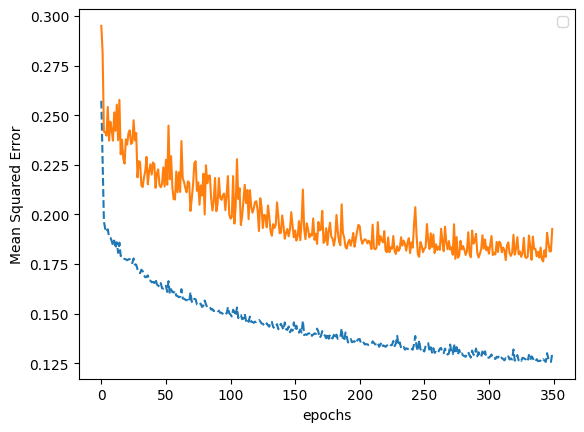

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


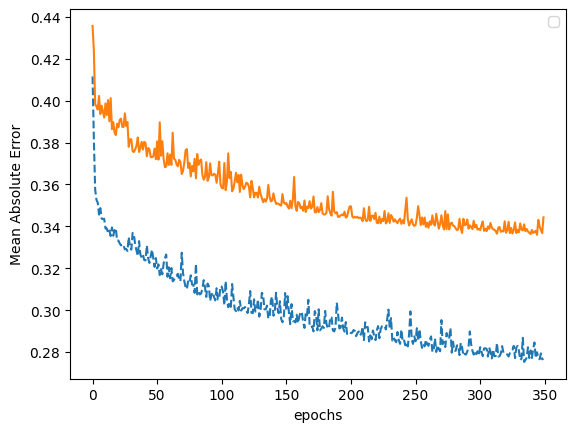

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


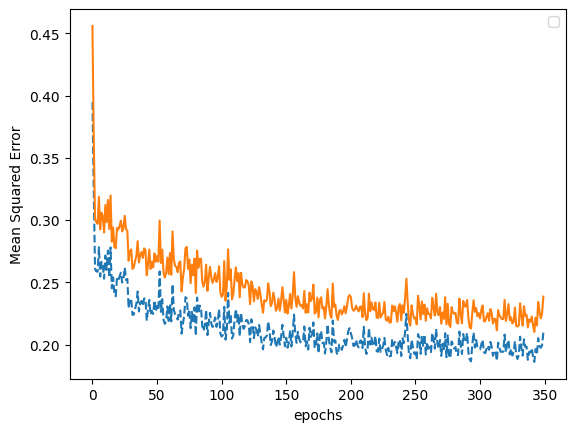

< OPT. SCORE_SUM EPOCH  242 > : -1.299262822207868
opt. DEV MSE :  0.1832256302699546
opt. TEST1 MSE :  0.2010952414975604
opt. TEST2 MSE :  0.2255689790675571


In [2]:
Reg = False
ELBOW = 5
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'
scores = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\models\\" + d + ".csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(end_epoch)
plt.plot(scores[mse_columns[0]][:end_epoch],'--')
plt.plot(scores[mse_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--')
plt.plot(scores[mae_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--')
plt.plot(scores[test_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()

score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]

score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_SUM EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

# Other Model Testing

In [3]:
dev = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\train_dev_test\\before_arima\\dev.csv")
test1 = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\train_dev_test\\before_arima\\test1.csv")
test2 = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\train_dev_test\\before_arima\\test2.csv")

dev = dev.loc[:, ~dev.columns.str.contains('^Unnamed')]
test1 = test1.loc[:, ~test1.columns.str.contains('^Unnamed')]
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]

# Historical Model

In [4]:
STEP = 20

In [5]:
dev_pred = np.array(dev['20'])
dev_y = np.array(dev['21']).reshape(1,int(1117500/STEP))[0]
test1_pred = np.array(test1['21'])
test1_y = np.array(test1['22']).reshape(1,int(1117500/STEP))[0]
test2_pred = np.array(test2['22'])
test2_y = np.array(test2['23']).reshape(1,int(1117500/STEP))[0]

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

hist_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in hist_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.45972962674463597/0.5449256901702951
0.5004743757282852/0.5741338626153395
0.4458007396471275/0.5344811794752032


# Constant Correlation Model

In [6]:
pred = sum(dev['20'])/int(1117500/STEP)
dev_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test1['21'])/int(1117500/STEP)
test1_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test2['22'])/int(1117500/STEP)
test2_pred = np.array([pred] * int(1117500/STEP))

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

cc_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in cc_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.29544525139722133/0.4423213810121434
0.2639044871829422/0.44361899692315415
0.2903170947173454/0.457613454020793


# Multi Group Model

In [7]:
data_df = pd.read_csv('C:\\Users\\saira\\Desktop\\arima_lstm_model\\dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\saira\\Desktop\\arima_lstm_model\\dataset.csv'

In [ ]:
data = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\SP500_list.csv")
print(data['GICS_sector'].unique())
print(data.head())

In [ ]:
# portfolio list
portfolio = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']

In [ ]:
pf_sector_item = {'Industrials':[],
                  'Health Care':[],
                  'Information Technology':[],
                  'Consumer Discretionary':[],
                  'Utilities':[],
                  'Financials' :[],
                  'Materials':[],
                  'Real Estate':[],
                  'Consumer Staples':[],
                  'Energy':[],
                  'Telecommunication Services':[]}
for item in portfolio :
    pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]] = pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]]+[item]
print(pf_sector_item)


In [ ]:
market_data = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock08_price.csv")
pf_sector_dev = {}
pf_sector_test1 = {}
pf_sector_test2 = {}

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_price = market_data[a]
        b_price = market_data[b]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev = []
        test1 = []
        test2 = []
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev.append(a_price[dev_start:dev_start+100].corr(b_price[dev_start:dev_start+100]))
            test1.append(a_price[test1_start:test1_start+100].corr(b_price[test1_start:test1_start+100]))
            test2.append(a_price[test2_start:test2_start+100].corr(b_price[test2_start:test2_start+100]))
        
        try:
            pf_sector_dev[sector_pair] = pf_sector_dev[sector_pair] + [dev]
        except KeyError :
            pf_sector_dev[sector_pair] = [dev]
            
        try:
            pf_sector_test1[sector_pair] = pf_sector_test1[sector_pair] + [test1]
        except KeyError :
            pf_sector_test1[sector_pair] = [test1]
            
        try:
            pf_sector_test2[sector_pair] = pf_sector_test2[sector_pair] + [test2]
        except KeyError :
            pf_sector_test2[sector_pair] = [test2]

In [ ]:
pairs = [key for key in pf_sector_dev]
sector_pair_corr_dev = {}
sector_pair_corr_test1 = {}
sector_pair_corr_test2 = {}
for pair in pairs :
    dev_zeroes = np.array([0] * 5)
    test1_zeroes = np.array([0] * 5)
    test2_zeroes = np.array([0] * 5)
    dev_length = len(pf_sector_dev[pair])
    test1_length = len(pf_sector_test1[pair])
    test2_length = len(pf_sector_test2[pair])
    for arr in pf_sector_dev[pair] :
        dev_zeroes = dev_zeroes + np.array(arr)
        dev_result = dev_zeroes/dev_length
    for arr in pf_sector_test1[pair] :
        test1_zeroes = test1_zeroes + np.array(arr)
        test1_result = test1_zeroes/test1_length
    for arr in pf_sector_test2[pair] :
        test2_zeroes = test2_zeroes + np.array(arr)
        test2_result = test2_zeroes/test2_length
    sector_pair_corr_dev[pair] = dev_result
    sector_pair_corr_test1[pair] = test1_result
    sector_pair_corr_test2[pair] = test2_result

In [ ]:
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

dev_pred = []
test1_pred = []
test2_pred = []
for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev_pred = dev_pred + list(sector_pair_corr_dev[sector_pair])
        test1_pred = test1_pred + list(sector_pair_corr_test1[sector_pair])
        test2_pred = test2_pred + list(sector_pair_corr_test2[sector_pair])
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)


dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))

# Single Index Model

In [ ]:
data_df = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock08_price.csv")
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]

In [ ]:
dev_pred = []
test1_pred = []
test2_pred = []

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev_pred.append(data_df[a][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]) *
                            data_df[b][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]))
            test1_pred.append(data_df[a][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100])*
                              data_df[b][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100]))
            test2_pred.append(data_df[a][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100])*
                              data_df[b][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100]))
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)
            
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("C:\\Users\\saira\\Desktop\\arima_lstm_model\\dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

  

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))                  